In [11]:
%matplotlib inline
import tensorflow as tf
import numpy as np
# import qit
import matplotlib
import matplotlib.pyplot as plt
from random import randint
import pycosat
import random
import scipy.linalg as la
import pandas as pd
import scipy.sparse as sparse
import scipy.sparse.linalg as lasp
from numba import jit
import pymp
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [64]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)


def forwardprop(X, w_1, w_2):
    
    h    = tf.nn.sigmoid(tf.matmul(X, w_1)) 
    yhat = tf.matmul(h, w_2)  
    return yhat

def raw_to_data2(beta, N, Hams_per_M, samples_per_ham):
    
    variable_file = 'variable_array_b' + str(beta) + '_N' + str(N) + '_HpM' + str(Hams_per_M) + '_SpH' + str(samples_per_ham) +  '.npy'         
    sol_file = 'sol_array_b' + str(beta)  + '_N' + str(N)  + '_HpM' + str(Hams_per_M) + '_SpH' + str(samples_per_ham) + '.npy'
    variable_array = np.load(variable_file) 
    sol_array = np.load(sol_file)
    
    X = variable_array
    y = np.eye(2)[sol_array] 
    X, y = shuffle(X, y, random_state=RANDOM_SEED)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=RANDOM_SEED)   
    return train_X, train_y, test_X, test_y, sol_array

    
    
def raw_to_data1(beta):
    
    folder = './dataN15/'
    variable_file = folder + 'variable_array_b' + str(beta) + '.npy'
    sol_file = folder + 'sol_array_b' + str(beta) + '.npy'
    variable_array = np.load(variable_file) 
    sol_array = np.load(sol_file)
    
    X = variable_array
    y = np.eye(2)[sol_array] 
    X, y = shuffle(X, y, random_state=RANDOM_SEED)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=RANDOM_SEED)   
    return train_X, train_y, test_X, test_y, sol_array

def train_and_test(train_X, train_y, test_X, test_y):

    batch_size = 1
    epochs = 100
    train_accuracy_array = []
    test_accuracy_array = []
    
    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes
    h_size = 100          # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes (2 comes from solvable hamiltonian or non solvable hamiltonian)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(epochs):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + batch_size], y: train_y[i: i + batch_size]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))
        
        train_accuracy_array.append(train_accuracy)
        test_accuracy_array.append(test_accuracy)

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
    
    sess.close()
    return train_accuracy_array, test_accuracy_array, list(range(epoch+1))

Epoch = 1, train accuracy = 75.87%, test accuracy = 74.69%
Epoch = 2, train accuracy = 75.87%, test accuracy = 74.69%
Epoch = 3, train accuracy = 75.92%, test accuracy = 74.69%
Epoch = 4, train accuracy = 76.02%, test accuracy = 74.80%
Epoch = 5, train accuracy = 76.16%, test accuracy = 74.64%
Epoch = 6, train accuracy = 76.11%, test accuracy = 74.53%
Epoch = 7, train accuracy = 76.18%, test accuracy = 74.25%
Epoch = 8, train accuracy = 76.47%, test accuracy = 74.08%
Epoch = 9, train accuracy = 76.64%, test accuracy = 74.08%
Epoch = 10, train accuracy = 76.92%, test accuracy = 73.97%
Epoch = 11, train accuracy = 77.28%, test accuracy = 74.08%
Epoch = 12, train accuracy = 77.47%, test accuracy = 73.80%
Epoch = 13, train accuracy = 77.97%, test accuracy = 73.52%
Epoch = 14, train accuracy = 78.60%, test accuracy = 73.80%
Epoch = 15, train accuracy = 79.43%, test accuracy = 73.80%
Epoch = 16, train accuracy = 80.34%, test accuracy = 73.36%
Epoch = 17, train accuracy = 81.29%, test accurac

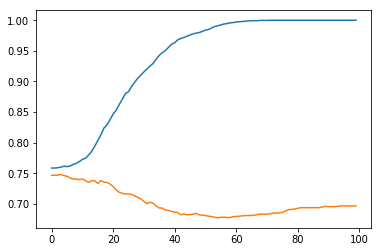

In [67]:
beta = 2.25
train_X, train_y, test_X, test_y, sol = raw_to_data1(beta)
train_accuracy, test_accuracy, epochs = train_and_test(train_X, train_y, test_X, test_y)
plt.plot(epochs, train_accuracy)
plt.plot(epochs, test_accuracy)

In [47]:
beta = 0.75
train_X, train_y, test_X, test_y, sol = raw_to_data(beta)
len(train_y)
train_y[89]
unique, counts = np.unique(sol, return_counts=True)
dict(zip(unique, counts))
#train_accuracy, test_accuracy, epochs = train_and_test(train_X, train_y, test_X, test_y)


{0: 2260, 1: 730}